<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Emiliano Mena González. Dario Castro

**Fecha:** 11 de marzo del 2023.

**Expediente** : 728407.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/EmilianoMena/ProyectoConjunto_EMena_DCastro.

# Tarea 4: Clase 9

># <font color ='red'> **Tarea 4** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.

### Ejercicio 1:
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Código de solución estudiante 1

In [17]:
def Fx1(N):
    y = ((np.sin(np.random.random(N)*np.pi)/2))**2
    return y

C:\Users\KODHA\AppData\Local\Temp\ipykernel_15648\496956996.py:6: RuntimeWarning: divide by zero encountered in true_divide
  y2 = 1/(np.pi*np.sqrt(x*(1-x)))


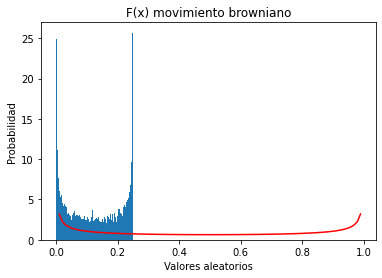

In [18]:
# Numero de generaciones
N = 10000
y = Fx1(N)
#Parametros de la funcion
x = np.arange(0,1,0.01)
y2 = 1/(np.pi*np.sqrt(x*(1-x)))
plt.plot(x,y2,'red')
#Historgrama
plt.hist(y,bins=100,density=True)
plt.xlabel('Valores aleatorios')
plt.ylabel('Probabilidad')
plt.title('F(x) movimiento browniano')
plt.show()

In [19]:
def Fx2(N):
    y = (np.sin((np.random.random(N)*np.pi)/2))**2
    return y

C:\Users\KODHA\AppData\Local\Temp\ipykernel_15648\1390697910.py:6: RuntimeWarning: divide by zero encountered in true_divide
  y2 = 1/(np.pi*np.sqrt(x*(1-x)))


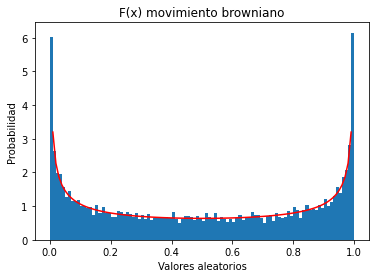

In [20]:
# Numero de generaciones
N = 10000
y = Fx2(N)
#Parametros de la funcion
x = np.arange(0,1,0.01)
y2 = 1/(np.pi*np.sqrt(x*(1-x)))
plt.plot(x,y2,'red')
#Historgrama
plt.hist(y,bins=100,density=True)
plt.xlabel('Valores aleatorios')
plt.ylabel('Probabilidad')
plt.title('F(x) movimiento browniano')
plt.show()

Código de solución estudiante 2

In [23]:
# Función transformada inversa de F(x)
def Fx(N):
    y = (np.sin((np.random.random(N)*np.pi)/2))**2
    return y

C:\Users\emili\AppData\Local\Temp\ipykernel_9316\729814727.py:7: RuntimeWarning: divide by zero encountered in true_divide
  y2 = 1/(np.pi*np.sqrt(x*(1-x)))


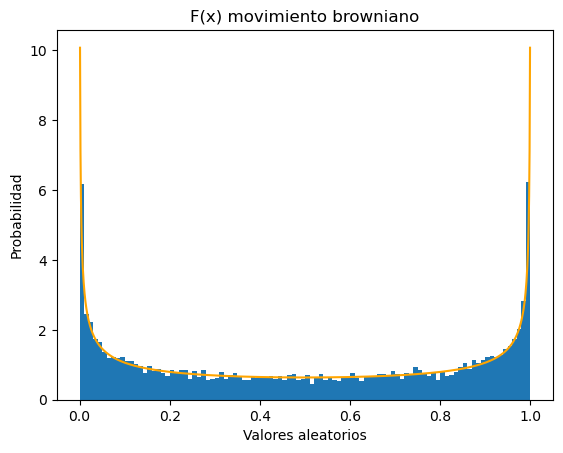

In [24]:
# Número de muestras
N = 10000
# Crear muestras de la función transformada inversa
y = Fx(N)
# Función de densidad
x = np.arange(0,1,0.001)
y2 = 1/(np.pi*np.sqrt(x*(1-x)))
plt.plot(x,y2,'orange')
# Histograma
plt.hist(y,bins=100,density=True)
plt.xlabel('Valores aleatorios')
plt.ylabel('Probabilidad')
plt.title('F(x) movimiento browniano')
plt.show()

### Ejercicio 2:
> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

Código de solución estudiante 1

In [26]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    # Diccionario de valores aleatorios
    v = {i: val for i, val in enumerate(indices)}
    # Series de los valores aletorios
    resultado = pd.Series([sum([1 for i in p_acum if i<ui]) for ui in u]).map(v)
    return resultado

In [35]:
# Función que calcula la probabilidad acumulada optimizada
def Fx_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

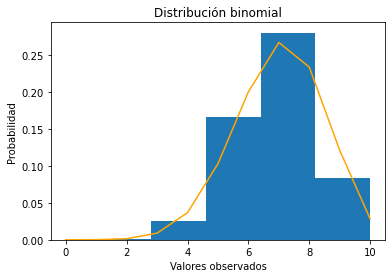

In [38]:
#Número de observaciones
num_observaciones = 1000

#Crear observaciones de la función transformada inversa
num_exitos, probabilidad_exito = 10, 0.7
probabilidad_acumulada = Fx_binomial(num_exitos, probabilidad_exito)
distribucion_binomial = Gen_distr_discreta(probabilidad_acumulada, np.arange(0, num_exitos+1), num_observaciones)

#Función de densidad
x = np.arange(num_exitos+1)
y = [np.math.comb(num_exitos, i)*probabilidad_exito**i*(1-probabilidad_exito)**(num_exitos-i) for i in x]
plt.plot(x, y, 'orange')

#Histograma
plt.hist(distribucion_binomial, bins=5, density=True)
plt.xlabel('Valores observados')
plt.ylabel('Probabilidad')
plt.title('Distribución binomial')
plt.show()

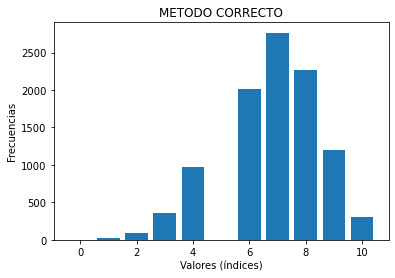

In [39]:
# Número de muestras
N = 10000

# Crear muestras de la función transformada inversa
n, p = 10, 0.7
p_acum = Fx_binomial(n, p)
val = np.arange(0, n+1)

# Generar muestras utilizando el método correcto
v = Gen_distr_discreta(p_acum, val, N)

# Histograma utilizando el método correcto
y, bins = np.histogram(v, bins=len(set(val)))
plt.bar(val, y)
plt.title('METODO CORRECTO')
plt.xlabel('Valores (índices)')
plt.ylabel('Frecuencias')
plt.show()

Código de solución estudiante 2

In [25]:
# Función que calcula la probabilidad acumulada optimizada
def Fx_binomial(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [26]:
# Función acumulada discreta
def discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return y

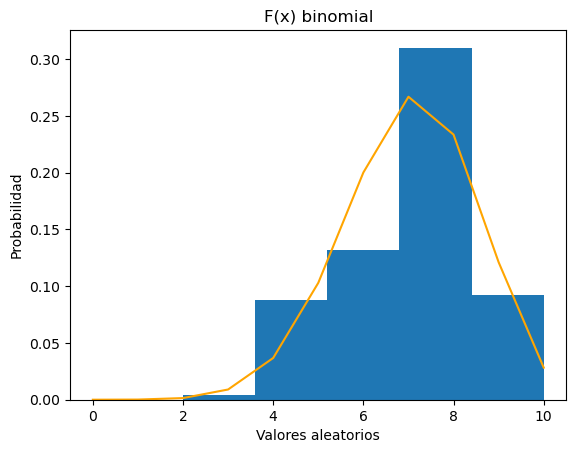

In [27]:
# Número de muestras
N = 1000
# Crear muestras de la función transformada inversa
n, p = 10, 0.7
p_acum = Fx_binomial(n,p)
d_binomial = discreta(p_acum, np.arange(0, n+1), N)
# Función de densidad
x=np.arange(n+1)
y=[np.math.comb(n,i)*p**i*(1-p)**(n-i) for i in x]
plt.plot(x,y,'orange')
# Histograma
plt.hist(d_binomial,bins=5,density=True)
plt.xlabel('Valores aleatorios')
plt.ylabel('Probabilidad')
plt.title('F(x) binomial')
plt.show()

### Ejercicio 3:
>3. $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

Código de solución estudiante 1

Una ventaja de esta forma recursiva es que puede ser utilizada para calcular la probabilidad $p_n$ para cualquier valor de $n$, a partir de la probabilidad inicial $p_0$. Además, esta fórmula se puede calcular de manera eficiente mediante programación, lo que la hace muy útil en situaciones en las que es necesario realizar cálculos repetitivos.

Otra ventaja es que esta fórmula puede ser interpretada de manera intuitiva. El factor $\frac{n-i}{i+1}$ representa la probabilidad de que el evento ocurra $i+1$ veces en $n$ intentos, mientras que el factor $\frac{p}{1-p}$ representa las probabilidades relativas de éxito y fracaso del evento en un solo intento. Al multiplicar estos dos factores por la probabilidad anterior $p_i$, se obtiene la probabilidad actualizada $p_{i+1}$.

Código de solución estudiante 2

### Ejercicio 4:
4. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

Código de solución estudiante 1

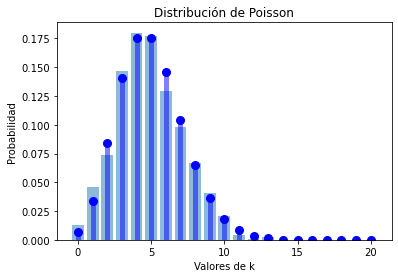

In [41]:
import math

# Definir la función de distribución acumulada
def Fx_poisson(k, lam):
    cdf = 0
    for i in range(k+1):
        cdf += np.exp(-lam) * (lam**i) / np.math.factorial(i)
    return cdf

# Generar valores de k para la distribución
lam = 5
k_vals = np.arange(0, 21)

# Calcular la función de distribución acumulada
p_acum = [Fx_poisson(k, lam) for k in k_vals]

# Generar valores aleatorios utilizando la técnica de la transformada inversa
num_observaciones = 1000
u_vals = np.random.uniform(size=num_observaciones)
d_poisson = np.zeros(num_observaciones)

for i in range(num_observaciones):
    j = 0
    while u_vals[i] > p_acum[j]:
        j += 1
    d_poisson[i] = k_vals[j]

# Graficar la distribución Poisson y el histograma de los valores generados
plt.plot(k_vals, [np.exp(-lam)*(lam**k)/np.math.factorial(k) for k in k_vals], 'bo', ms=8)
plt.vlines(k_vals, 0, [np.exp(-lam)*(lam**k)/np.math.factorial(k) for k in k_vals], colors='b', lw=5, alpha=0.5)
plt.bar(k_vals, np.bincount(np.round(d_poisson).astype(int), minlength=len(k_vals))/num_observaciones, alpha=0.5)
plt.xlabel('Valores de k')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson')
plt.show()


Usando la función de distribución de probabilidad de la distribución Poisson:
$$ P(k) = \frac{e^{-\lambda}\lambda^k}{k!} $$
Podemos calcular P(k+1):
$$ P(k+1) = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!} $$
Ahora, multiplicamos y dividimos por P(k):
$$ P(k+1) = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!} \cdot \frac{k!}{e^{-\lambda}\lambda^k} = \frac{\lambda}{k+1} \cdot \frac{e^{-\lambda}\lambda^{k}}{k!} \cdot k! $$
$$ P(k+1) = \frac{\lambda}{k+1} P(k) $$
Por lo tanto, queda demostrado que
$$ P(k+1) = \frac{\lambda}{k+1} P(k) $$


Código de solución estudiante 2